## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [95]:
# Import packages

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Part 1: Exploring & cleaing the data

### 1.

In [134]:
pd.set_option('display.max_columns', None)

# import data into 2 dataframes so I can manipulate numerical and categorical separately later on
data_num = pd.read_csv('Employee_Retention.csv')
data_cat = pd.read_csv('Employee_Retention.csv')

### 2.

In [135]:
# Getting an overview of the numerical features

data_num.describe()

# Note: The ranges of each feature vary widely, so we need to normalize 

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### 3

In [ ]:
# Columns I don't want: 
  # 3 - Dailyrate (redudant to hourlyrate)
  # 8 - Employee count (just an ID)
  # 9 - Employee number (also an ID)
  # 18 - Monthly Income (redudantant to hourlyrate)
  # 19 - Monthly Reate (redudantant to hourlyrate)
  # 21 - Over 18 (all of them are over 18)
  # 26 - StandardHours (they are all 80)

# Dropping columns I don't want + categorical features
data_num.drop(data_num.columns[[1,2,3,4,7,8,9,11,15,17,18,19,21,22,26]], axis=1, inplace=True)
print(data_num.head(), '\n')

# Dropping columns I don't want + numerical features 
data_cat.drop(data_cat.columns[[0,3,5,6,8,9,10,12,13,14,16,18,19,20,21,23,24,25,26,27,28,29,30,31,32,33,34]], axis=1, inplace=True)
print(data_cat.head())

### 4.

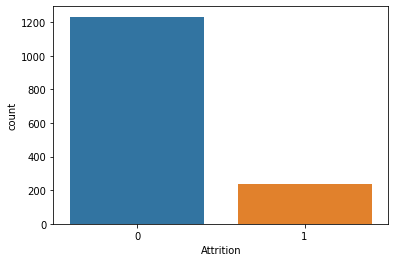

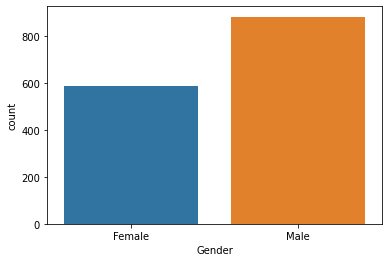

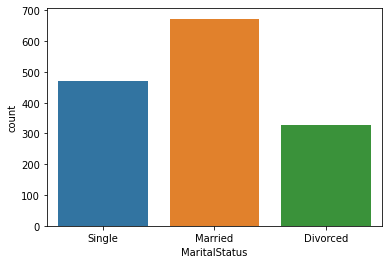

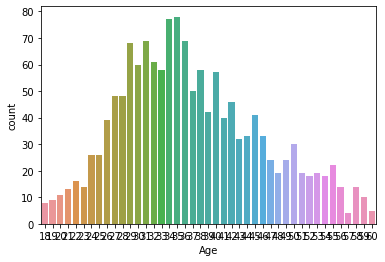

In [100]:
# Plot count plots to get a feel for some of the data

plt.figure(1)
sb.countplot(x='Attrition', data=data_cat)
plt.savefig('Attrition count plot', dpi=200)

plt.figure(2)
sb.countplot(x='Gender', data=data_cat)
plt.savefig('Gender count plot', dpi=200)

plt.figure(3)
sb.countplot(x='MaritalStatus', data=data_cat)
plt.savefig('Marital status count plot', dpi=200)

plt.figure(4)
sb.countplot(x='Age', data=data_num)
plt.savefig('Age count plot', dpi=200)

plt.show()


### 5.

In [ ]:
# Normalizing the data between 0 & 1

scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(data_num)
cols = ['Age','DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
data_num_norm = pd.DataFrame(normalizedData, columns=cols)
print(data_num_norm.head())

### 6.

In [6]:
# Viewing the normalized numerical features

data_num_norm.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.00000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.450567,0.292590,0.478231,0.573923,0.512731,0.576644,0.265986,0.576190,0.299244,0.300680,0.153741,0.570748,0.264626,0.28199,0.466553,0.587075,0.175204,0.234958,0.145850,0.242537
std,0.217509,0.289531,0.256041,0.364361,0.290420,0.237187,0.276735,0.367615,0.277557,0.261424,0.360824,0.360403,0.284026,0.19452,0.214878,0.235492,0.153163,0.201285,0.214829,0.209890
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.035714,0.250000,0.333333,0.257143,0.333333,0.000000,0.333333,0.111111,0.071429,0.000000,0.333333,0.000000,0.15000,0.333333,0.333333,0.075000,0.111111,0.000000,0.117647
50%,0.428571,0.214286,0.500000,0.666667,0.514286,0.666667,0.250000,0.666667,0.222222,0.214286,0.000000,0.666667,0.333333,0.25000,0.500000,0.666667,0.125000,0.166667,0.066667,0.176471
75%,0.595238,0.464286,0.750000,1.000000,0.767857,0.666667,0.500000,1.000000,0.444444,0.500000,0.000000,1.000000,0.333333,0.37500,0.500000,0.666667,0.225000,0.388889,0.200000,0.411765
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 7.

In [7]:
# Checking what's inside data_cat

print(data_cat.head())

  Attrition     BusinessTravel              Department EducationField  Gender  \
0       Yes      Travel_Rarely                   Sales  Life Sciences  Female   
1        No  Travel_Frequently  Research & Development  Life Sciences    Male   
2       Yes      Travel_Rarely  Research & Development          Other    Male   
3        No  Travel_Frequently  Research & Development  Life Sciences  Female   
4        No      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus OverTime  
0        Sales Executive        Single      Yes  
1     Research Scientist       Married       No  
2  Laboratory Technician        Single      Yes  
3     Research Scientist       Married      Yes  
4  Laboratory Technician       Married       No  


### 8.

In [ ]:
# Replacing "Yes" & "No" in Attrition (target variable) with 1's & 0's so the models don't break later on

data_cat = data_cat.replace({'Attrition': {'Yes': 1, 'No': 0}})

data_cat

### 9.

In [ ]:
# Turning data_class (except Attrition) into dummy variabls 

data_cat_dum = pd.get_dummies(data_cat, columns=['BusinessTravel', 'Department','EducationField', 'Gender','JobRole','MaritalStatus','OverTime'])
print(data_cat_dum)

### 10.

In [ ]:

# Combines the two datasets 

complete_data = pd.concat([data_cat_dum, data_num_norm], axis=1, join='inner')
print(complete_data.head())

# Part 2: Modeling the data

In [19]:
# Splitting data into X & y

X = complete_data.iloc[:, 1:] # takes the rest of the columns as x
y = complete_data.iloc[:, 0:1] # takes the first column (Attrition) as y

# Partitioning data into training & testing using test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [38]:
# Uses dummy classifier to find the baseline accuracy

dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)

print("Baseline Accuracy =", baseline_acc)


Baseline Accuracy = 0.8616780045351474


## Logistic Regression

In [106]:
model_lr = LogisticRegression()

model_lr.fit(X_train, y_train)
          
predict_lr = lr.predict(X_test)

acc_Logistic_Reg = accuracy_score(y_test, predict_lr)
print('Logistic Regression Accuracy =', acc_Logistic_Reg, '\n')

Logistic Regression Accuracy = 0.8843537414965986 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Decision Tree

In [69]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth = 3)

#3: Fit the model
dt.fit(X_train, y_train)

# Predict
predict_dt = dt.predict(X_test)

#accuracy on testing partition
acc_Decision_Tree = accuracy_score(y_test, predict_dt)
print('Decision Tree Accuracy =', acc_Decision_Tree)

Decision Tree Accuracy = 0.8684807256235828


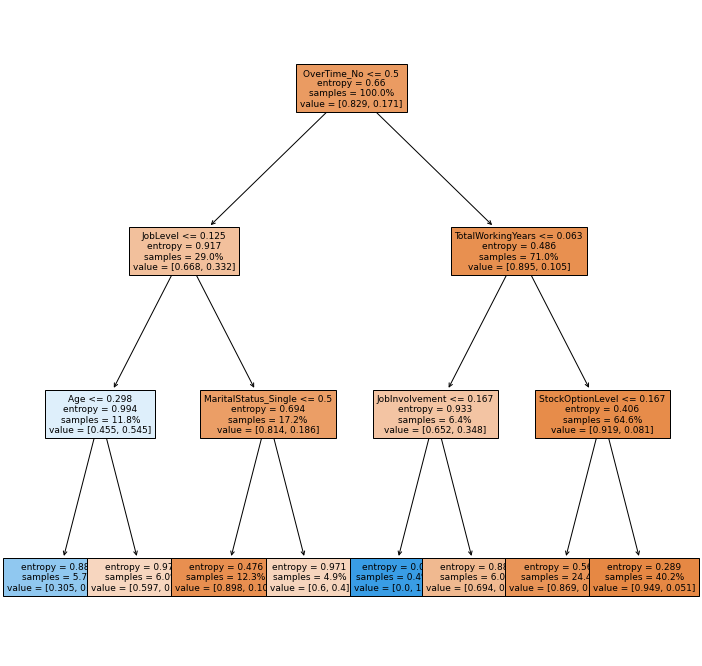

In [101]:
# Viewing the decision tree

plt.figure(2,figsize=(12,12))
fn = X.columns
Tree = tree.plot_tree(dt, feature_names=fn, filled=True, proportion=True, fontsize=9)
plt.savefig('WorkDT.jpeg', quality=500)
plt.show()

## Bagging

In [137]:

#1 - Create an instance of the model
model_bagging = BaggingClassifier(n_estimators=10,random_state = 42,)

#2 - Train the model based on the training data
model_bagging.fit(X_train, y_train)

#3 - Predict on testing data 
pred_bagging = model_bagging.predict(X_test)

#4 - Get your accuracy score
acc_bagging = accuracy_score(y_test, pred_bagging)
print('Bagging Accuracy =', acc_bagging, '\n')

Bagging Accuracy = 0.8526077097505669 



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## RandomForest

In [138]:

model_rf = RandomForestClassifier(n_estimators=100, max_features=7, random_state=42)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)

acc_RandomForest = accuracy_score(y_test, predict_rf)
print('Random Forest Accuracy =', acc_RandomForest, '\n')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest Accuracy = 0.8616780045351474 



In [29]:
# Random Forest Feature Importance

feature_importances = model_rf.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances}).nlargest(10, 'importance')

print(df)

              features  importance
28                 Age    0.076019
41   TotalWorkingYears    0.064904
29    DistanceFromHome    0.053481
32          HourlyRate    0.052601
44      YearsAtCompany    0.048293
36  NumCompaniesWorked    0.042347
26         OverTime_No    0.039065
45  YearsInCurrentRole    0.036385
27        OverTime_Yes    0.035927
37   PercentSalaryHike    0.034731


## Boosting

In [139]:
# AdaBoost Classification
# Enter your code here

base_est = DecisionTreeClassifier(max_depth =4)
ada_boost = AdaBoostClassifier(base_est, n_estimators=200, random_state=42, learning_rate=0.05)
ada_boost.fit(X_train, y_train)
predict_ada = ada_boost.predict(X_test)

acc_AdaBoost = accuracy_score(y_test, predict_ada)
print('\n Boosting Accuracy =', acc_AdaBoost, '\n')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 Boosting Accuracy = 0.8526077097505669 



In [59]:
# Feature Importance for boosing

feature_importances = ada_boost.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances}).nlargest(10, 'importance')

print(df)

                    features  importance
28                       Age    0.141383
29          DistanceFromHome    0.084146
32                HourlyRate    0.073080
35           JobSatisfaction    0.062735
47      YearsWithCurrManager    0.053543
46   YearsSinceLastPromotion    0.047496
39  RelationshipSatisfaction    0.043797
37         PercentSalaryHike    0.037560
36        NumCompaniesWorked    0.035734
41         TotalWorkingYears    0.031622


## Voting (ensemble of RandomForestClassifier, DecisionTreeClassifier, Support Vector Machine and Logistic Regression)

In [61]:

# setting up the four individual classifiers 
rfClf = RandomForestClassifier(n_estimators=200, random_state=0) 
dtClf = DecisionTreeClassifier(max_depth = 4)
svmClf = SVC(probability=True, random_state=0)
logClf = LogisticRegression(random_state=0)

# constructing the ensemble classifier by mentioning the individual classifiers.
clf2 = VotingClassifier(estimators = [('rf',rfClf), ('dt',dtClf), ('svm',svmClf), ('log', logClf)], voting='soft') 

# train the ensemble classifier
clf2.fit(X_train, y_train)

# predict
clf2_pred = clf2.predict(X_test)

voting_acc_score = accuracy_score(y_test, clf2_pred)
print('\n Voting accuracy =', voting_acc_score)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 Voting accuracy = 0.8843537414965986


## Accuracy Results

In [71]:
# All Accuracy Scores 

print("Baseline Accuracy =", baseline_acc, '\n')

print('Logistic Regression Accuracy =', acc_Logistic_Reg, '\n')

print('Decision Tree Accuracy =', acc_Decision_Tree, '\n')

print('Bagging Accuracy =', acc_bagging, '\n')

print('Random Forest Accuracy =', acc_RandomForest, '\n')

print('Boosting Accuracy =', acc_AdaBoost, '\n')

print('Voting accuracy =', voting_acc_score)

# Voting wins! 

Baseline Accuracy = 0.8616780045351474 

Logistic Regression Accuracy = 0.8843537414965986 

Decision Tree Accuracy = 0.8684807256235828 

Bagging Accuracy = 0.8526077097505669 

Random Forest Accuracy = 0.8616780045351474 

Boosting Accuracy = 0.8526077097505669 

Voting accuracy = 0.8843537414965986


## Part 3: Looking at Logistic Regression in more detail

In [130]:
model_lr = LogisticRegression(class_weight={0:.85, 1:.15})

model_lr.fit(X_train, y_train)
          
predict_lr = model_lr.predict(X_test)

acc_Logistic_Reg = accuracy_score(y_test, predict_lr)
print('Logistic Regression Accuracy =', acc_Logistic_Reg, '\n')


Logistic Regression Accuracy = 0.8616780045351474 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [131]:
model_lr = LogisticRegression(C=2)

model_lr.fit(X_train, y_train)
          
predict_lr = model_lr.predict(X_test)

acc_Logistic_Reg = accuracy_score(y_test, predict_lr)
print('Logistic Regression Accuracy =', acc_Logistic_Reg, '\n')


Logistic Regression Accuracy = 0.8843537414965986 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[369  11]
 [ 40  21]]


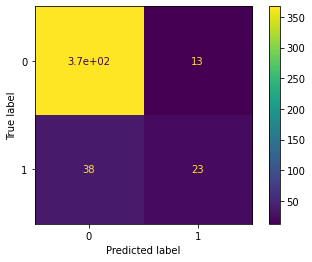

In [132]:
# Confusion matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(model_lr, X_test, y_test)
plt.show()